In [1]:
 ! pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"daffashafwan","key":"9f31e017db0b036e031727d13e746047"}'}

In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle datasets download -d idhamozi/indonesian-sign-language-bisindo

 99% 878M/890M [00:09<00:00, 98.0MB/s]
100% 890M/890M [00:09<00:00, 100MB/s] 


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
print(tf.__version__)
import warnings

2.4.1


In [7]:
!unzip indonesian-sign-language-bisindo.zip

Archive:  indonesian-sign-language-bisindo.zip
  inflating: Dataset BISINDO/datatest/A/IMG_1151.JPG  
  inflating: Dataset BISINDO/datatest/A/IMG_1152.JPG  
  inflating: Dataset BISINDO/datatest/A/IMG_1153.JPG  
  inflating: Dataset BISINDO/datatest/A/IMG_1154.JPG  
  inflating: Dataset BISINDO/datatest/A/IMG_1155.JPG  
  inflating: Dataset BISINDO/datatest/A/IMG_1156.JPG  
  inflating: Dataset BISINDO/datatest/A/IMG_1157.JPG  
  inflating: Dataset BISINDO/datatest/A/IMG_1158.JPG  
  inflating: Dataset BISINDO/datatest/A/IMG_1159.JPG  
  inflating: Dataset BISINDO/datatest/A/IMG_1160.JPG  
  inflating: Dataset BISINDO/datatest/A/IMG_1161.JPG  
  inflating: Dataset BISINDO/datatest/A/IMG_1162.JPG  
  inflating: Dataset BISINDO/datatest/A/IMG_1163.JPG  
  inflating: Dataset BISINDO/datatest/A/IMG_1164.JPG  
  inflating: Dataset BISINDO/datatest/A/IMG_1165.JPG  
  inflating: Dataset BISINDO/datatest/A/IMG_1166.JPG  
  inflating: Dataset BISINDO/datatest/B/IMG_1213.JPG  
  inflating: Datas

In [8]:
train_dir = 'Dataset BISINDO/datatrain/'
test_dir = 'Dataset BISINDO/datatest/'

In [9]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [10]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest'
                    )

In [11]:
val_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [12]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  
        target_size=(150, 150),
        batch_size=4,
        class_mode='categorical')

Found 1727 images belonging to 27 classes.


In [13]:
validation_generator = val_datagen.flow_from_directory(
        test_dir, 
        target_size=(150, 150), 
        batch_size=4, 
        class_mode='categorical')

Found 432 images belonging to 27 classes.


In [14]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(27, activation='softmax')
])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [16]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [17]:
history = model.fit(
      train_generator,
      steps_per_epoch=25, 
      epochs=100,
      validation_data=validation_generator, 
      validation_steps=5,  
      verbose=1)

Epoch 1/100
25/25 [==============================] - 15s 567ms/step - loss: 3.3340 - accuracy: 0.0342 - val_loss: 3.2925 - val_accuracy: 0.0500
Epoch 2/100
25/25 [==============================] - 13s 531ms/step - loss: 3.3003 - accuracy: 0.0131 - val_loss: 3.2944 - val_accuracy: 0.0000e+00
Epoch 3/100
25/25 [==============================] - 14s 545ms/step - loss: 3.2965 - accuracy: 0.0431 - val_loss: 3.2887 - val_accuracy: 0.0500
Epoch 4/100
25/25 [==============================] - 13s 526ms/step - loss: 3.3032 - accuracy: 0.0534 - val_loss: 3.3039 - val_accuracy: 0.0500
Epoch 5/100
25/25 [==============================] - 13s 524ms/step - loss: 3.2917 - accuracy: 0.0151 - val_loss: 3.2910 - val_accuracy: 0.1000
Epoch 6/100
25/25 [==============================] - 13s 529ms/step - loss: 3.3028 - accuracy: 0.0510 - val_loss: 3.2941 - val_accuracy: 0.0500
Epoch 7/100
25/25 [==============================] - 14s 535ms/step - loss: 3.2968 - accuracy: 0.0465 - val_loss: 3.2827 - val_accur

In [18]:
model.evaluate_generator(validation_generator)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[1.7629197835922241, 0.8009259104728699]

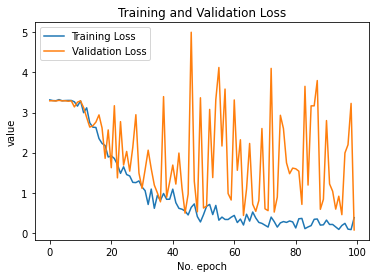

In [59]:
from matplotlib import pyplot as plt
# Plot history: MAE
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.ylabel('value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [32]:
import os

MODEL_BASE_PATH = "Model"
PROJECT_NAME = "Capstone/"
SAVE_MODEL_NAME = "15_5_2021.h5"
save_model_path = os.path.join(MODEL_BASE_PATH, PROJECT_NAME, SAVE_MODEL_NAME)

if os.path.exists(os.path.join(MODEL_BASE_PATH, PROJECT_NAME)) == False:
    os.makedirs(os.path.join(MODEL_BASE_PATH, PROJECT_NAME))
    
print('Saving Model At {}...'.format(save_model_path))
model.save(save_model_path,include_optimizer=False)

Saving Model At Model/Capstone/15_5_2021.h5...


In [61]:
pwd

'/content'

In [22]:
! ls

'Dataset BISINDO'		        kaggle.json   sample_data
 indonesian-sign-language-bisindo.zip   Model


In [60]:
labels = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N',
          'NOTHING','O','P','Q','R','S','T','U','V','W','X','Y','Z']

In [24]:
len(labels)

27

In [62]:
import requests
from io import BytesIO
from PIL import Image
import numpy as np
input_size = (150,150)
channel = (27,)
input_shape = input_size + channel

labels = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N',
          'NOTHING','O','P','Q','R','S','T','U','V','W','X','Y','Z']

In [63]:
def preprocess(img,input_size):
    nimg = img.convert('RGB').resize(input_size, resample= 0)
    img_arr = (np.array(nimg))/255
    return img_arr
def reshape(imgs_arr):
    return np.stack(imgs_arr, axis=0)

In [57]:
from google.colab import files
im = files.upload()

In [65]:
from tensorflow.keras.models import load_model
MODEL_PATH = '15_5_2021.h5'
model = load_model(MODEL_PATH,compile=False)

In [51]:
from google.colab import files
im = files.upload()

Saving photo.jpg to photo (1).jpg


In [66]:
imgg = Image.open('photo (1).jpg')
X = preprocess(imgg,input_size)
X = reshape([X])
y = model.predict(X)
print(y)
print( labels[np.argmax(y)], np.max(y) )

[[3.21831467e-05 1.24407131e-02 2.16989387e-02 5.33995626e-04
  2.52801105e-02 1.46524468e-03 2.95630278e-04 3.17403988e-08
  3.49146575e-07 7.45321638e-10 8.97765517e-01 1.51989225e-05
  1.50603577e-04 1.87706540e-03 6.89135859e-34 2.00032157e-13
  1.94403669e-03 4.26970841e-03 9.02694031e-11 2.48990580e-02
  7.42957462e-04 3.02820638e-07 9.86397607e-16 1.59147362e-06
  6.58348482e-03 8.00397482e-14 3.37113261e-06]]
K 0.8977655


In [50]:
files.download(image_file) 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

TESTING

In [40]:
import imutils
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

In [41]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [42]:
image_file = take_photo()

<IPython.core.display.Javascript object>

400 300


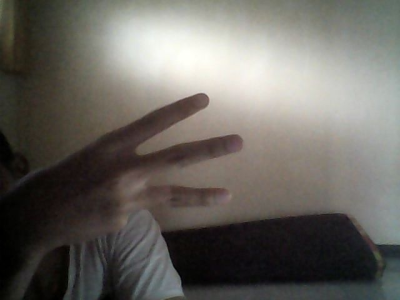

In [43]:
 #image = cv2.imread(image_file, cv2.IMREAD_UNCHANGED)
image = cv2.imread(image_file)

# resize it to have a maximum width of 400 pixels
image = imutils.resize(image, width=400)
(h, w) = image.shape[:2]
print(w,h)
cv2_imshow(image)

In [44]:
print("[INFO] loading model...")
prototxt = 'deploy.prototxt'
model = 'res10_300x300_ssd_iter_140000.caffemodel'
net = cv2.dnn.readNetFromCaffe(prototxt, model)

[INFO] loading model...


error: ignored